# Actividad Evaluable: Obtención de estadisticas descriptivas
#### Ethan Alejandro Alvarez Suarez - A00843413

In [2]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [3]:
diabetes = pd.read_csv("diabetes.csv")

# Descripción de Variables

- SkinThickness Skin Thickness (grasa local debajo de la piel - mm; 0 = NULL) : Cuantitativa Continua  
- Insulin Insulin (La cantidad de insulina que secreta el páncreas en respuesta a la glucosa - μU/mL (micro-units per milliliter); 0 = NULL) : Cuantitativa Continua  
- BMI Body Mass Index (Tamaño corporal total - kg/(m^2); 0 = NULL) : Cuantitativa Continua
- Outcome Diabetes (0 = Sin Diabetes; 1 = Diabetes) Categorica Nominal

In [4]:
#Rows & Columns
diabetes.iloc[:, 3:6].shape

(768, 3)

In [5]:
#Number of unique values for each dataset
diabetes.iloc[:, 3:6].nunique()

SkinThickness     51
Insulin          186
BMI              248
dtype: int64

# Variables Cuantitativas

### Medidas de tendencia central, STD, y Gráficos


## Exploración de Datos y Conclusiones

In [6]:
#number of null values in the datasets
diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).isna().sum()

SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [7]:
mean_SkinThickness = diabetes['SkinThickness'].mean()
median_SkinThickness = diabetes['SkinThickness'].median()
mode_SkinThickness = diabetes['SkinThickness'].mode()
print("Mean_SkinThickness: ", mean_SkinThickness)
print("Median_SkinThickness: ", median_SkinThickness)
print("Mode_SkinThickness: ", mode_SkinThickness)

mean_Insulin = diabetes['Insulin'].mean()
median_Insulin = diabetes['Insulin'].median()
mode_Insulin = diabetes['Insulin'].mode()
print("Mean_Insulin: ", mean_Insulin)
print("Median_Insulin: ", median_Insulin)
print("Mode_Insulin: ", mode_Insulin)

mean_BMI = diabetes['BMI'].mean()
median_BMI = diabetes['BMI'].median()
mode_BMI = diabetes['BMI'].mode()
print("Mean_BMI: ", mean_BMI)
print("Median_BMI: ", median_BMI)
print("Mode_BMI: ", mode_BMI)

Mean_SkinThickness:  20.536458333333332
Median_SkinThickness:  23.0
Mode_SkinThickness:  0    0
Name: SkinThickness, dtype: int64
Mean_Insulin:  79.79947916666667
Median_Insulin:  30.5
Mode_Insulin:  0    0
Name: Insulin, dtype: int64
Mean_BMI:  31.992578124999998
Median_BMI:  32.0
Mode_BMI:  0    32.0
Name: BMI, dtype: float64


In [8]:
#min/max values; mean/median values of each table WITH NULL VALUES
diabetes.iloc[:, 3:6].describe()

,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000
mean,20.536458,79.799479,31.992578
std,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.300000
50%,23.000000,30.500000,32.000000
75%,32.000000,127.250000,36.600000
max,99.000000,846.000000,67.100000


In [9]:
#next lowest value
print(diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).min())

SkinThickness       7
Insulin            14
BMI              18.2
dtype: object


In [10]:
#STD of table WITH NULL VALUES
diabetes[['SkinThickness', 'Insulin', 'BMI']].std()

SkinThickness     15.952218
Insulin          115.244002
BMI                7.884160
dtype: float64

### Data analysis excluding null values

In [11]:
#mean values of each table WITHOUT NULL VALUES
diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).mean()

SkinThickness      29.15342
Insulin          155.548223
BMI               32.457464
dtype: object

In [12]:
#median values of each table WITHOUT NULL VALUES
diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).median()

SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: object

In [13]:
#mode values of each table WITHOUT NULL VALUES
diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).mode()

,SkinThickness,Insulin,BMI
0,32,105,32.0


In [14]:
#STD of table WITHOUT NULL VALUES
diabetes[['SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).std()

SkinThickness     10.476982
Insulin          118.775855
BMI                6.924988
dtype: object

# Conclusiónes:  

## Para el grosor de la piel:  
Rango: (0, 99)  
siguiente valor más bajo: 7  
numero de valores null: 22  
- datos CON valores NULL:  
promedio: 20  
valor medio: 23  
valor más común: 0  
STD: 16  
---  
- datos SIN valores NULL:
promedio: 29  
valor medio: 29  
valor más común: 32  
STD: 10  
---  
## Para la insulina:  
Rango: (0, 846)  
siguiente valor más bajo: 14  
numero de valores null: 374
- datos CON valores NULL:  
promedio: 79  
valor medio: 30.5  
valor más común: 0  
STD: 115  
---  
- datos SIN valores NULL:  
promedio: 125  
valor medio: 125  
valor más común: 105  
STD: 118  
---  
## Para el BMI:  
Rango: (0, 67.1)  
siguiente valor más bajo: 18.2  
numero de valores null: 11  
- datos CON valores NULL:  
promedio: 32.0  
valor medio: 32.0  
valor más común: 32.0  
STD: 7.9  
---  
- datos SIN valores NULL:  
promedio: 32.5
valor medio: 32.3  
valor más común: 32.0
STD: 6.9

# Visualización y Análisis de Datos

## Diagrama de Barras

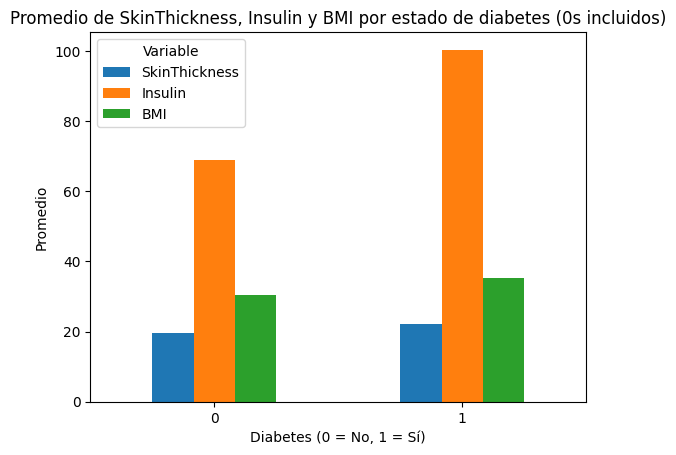

In [48]:
# Columns to analyze
cols = ["SkinThickness", "Insulin", "BMI"]

# Group by diabetes status and calculate average per column (include 0s)
grouped = diabetes.groupby("Outcome")[cols].mean()

# Plot bar chart
grouped.plot(kind="bar")
plt.title("Promedio de SkinThickness, Insulin y BMI por estado de diabetes (0s incluidos)")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.legend(title="Variable")
plt.show()

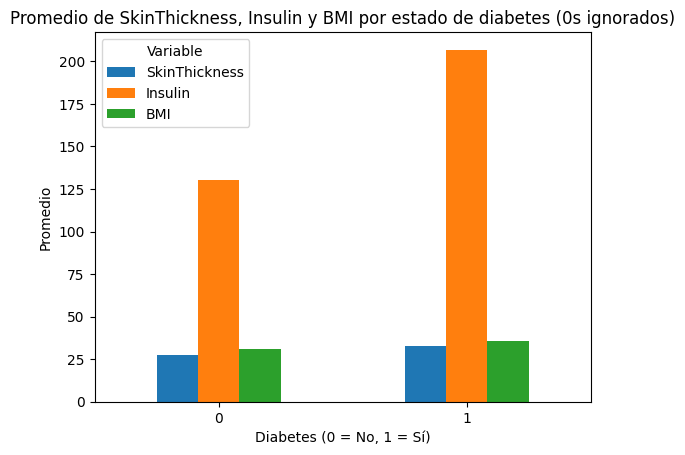

In [47]:
cols = ["SkinThickness", "Insulin", "BMI"]

# Replace 0s with NA so they are ignored in averages
diabetes_filtered = diabetes.copy()
diabetes_filtered[cols] = diabetes_filtered[cols].replace(0, pd.NA)

# Group by diabetes status and calculate average per column
grouped = diabetes_filtered.groupby("Outcome")[cols].mean()

# Plot bar chart
grouped.plot(kind="bar")
plt.title("Promedio de SkinThickness, Insulin y BMI por estado de diabetes (0s ignorados)")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.legend(title="Variable")
plt.show()

## Diagrama de Cajas y Bigotes

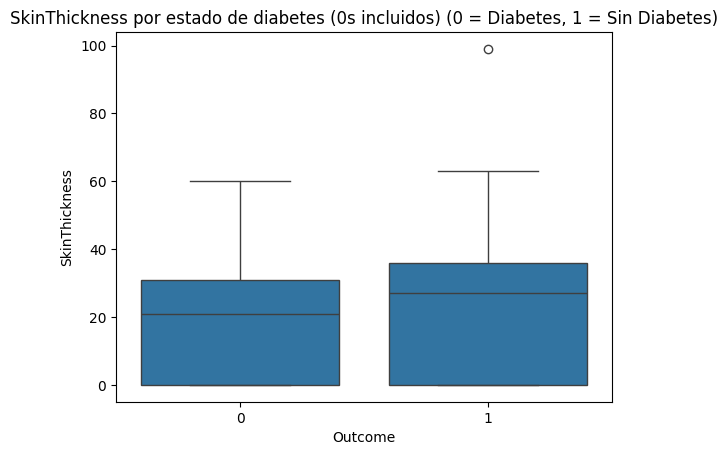

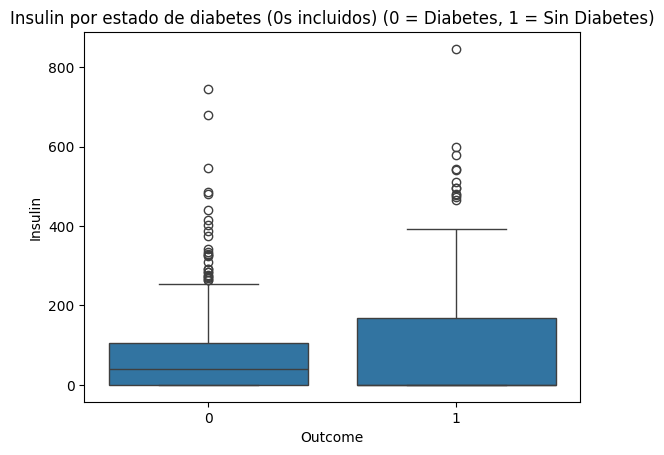

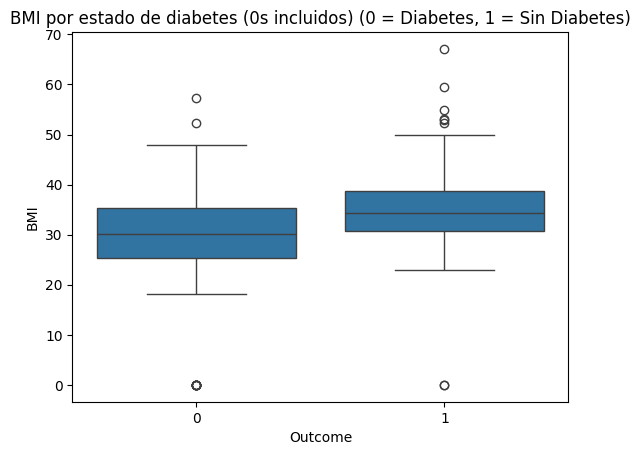

In [50]:
for col in ["SkinThickness", "Insulin", "BMI"]:
    sns.boxplot(x="Outcome", y=col, data=diabetes)
    plt.title(f"{col} por estado de diabetes (0s incluidos) (0 = Diabetes, 1 = Sin Diabetes)")
    plt.show()

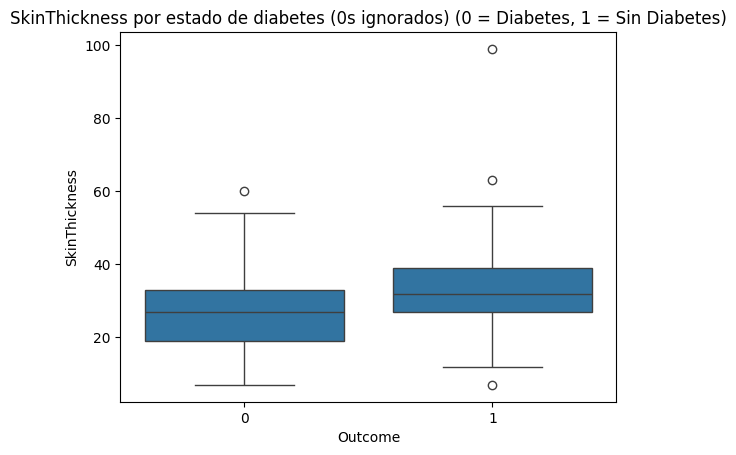

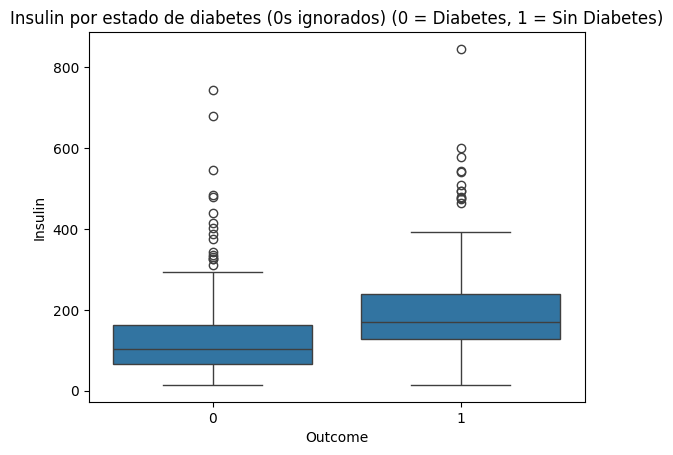

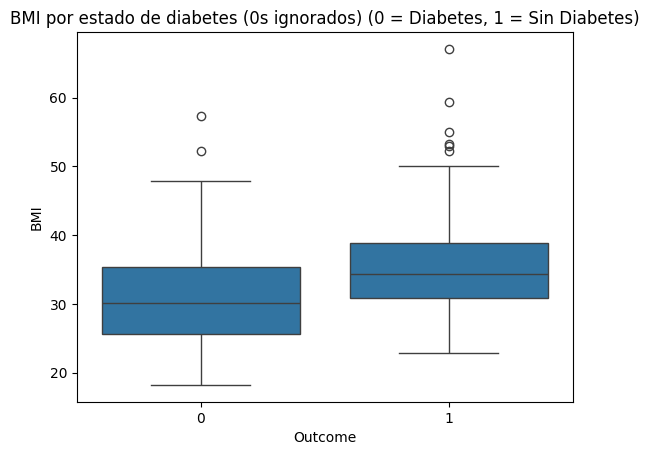

In [49]:
for col in ["SkinThickness", "Insulin", "BMI"]:
    filtered_data = diabetes[diabetes[col] != 0]
    sns.boxplot(x="Outcome", y=col, data=filtered_data)
    plt.title(f"{col} por estado de diabetes (0s ignorados) (0 = Diabetes, 1 = Sin Diabetes)")
    plt.show()

## Histograma

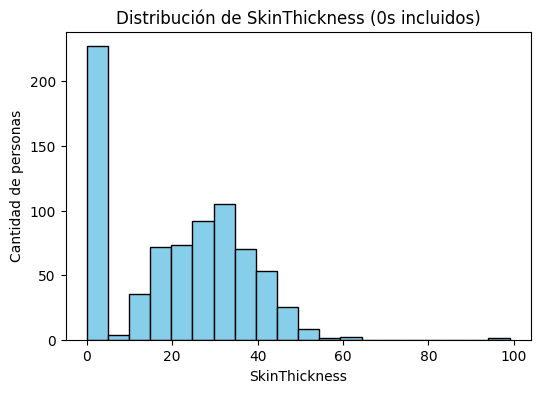

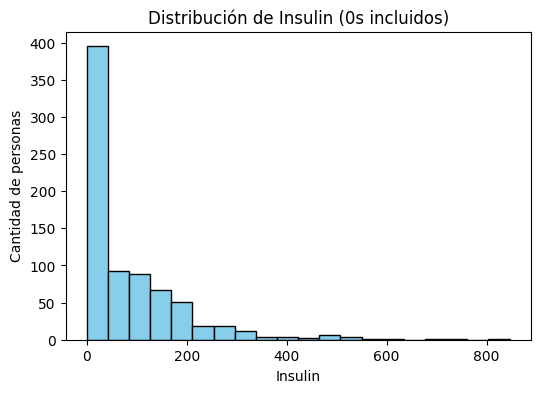

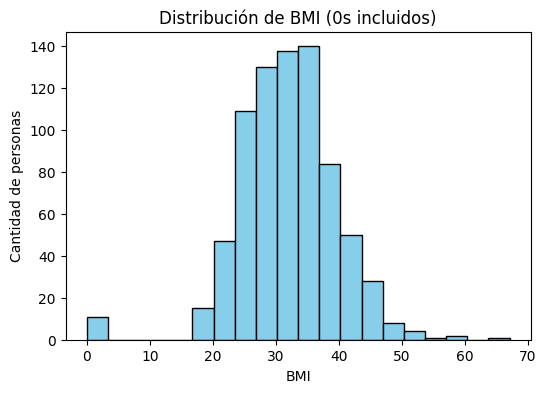

In [53]:
# Columns to plot
cols = ["SkinThickness", "Insulin", "BMI"]

# Create histograms
for col in cols:
    plt.figure(figsize=(6, 4))
    plt.hist(diabetes[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {col} (0s incluidos)")
    plt.xlabel(col)
    plt.ylabel("Cantidad de personas")
    plt.show()

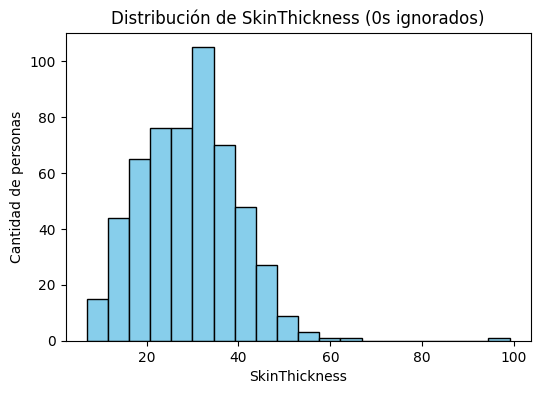

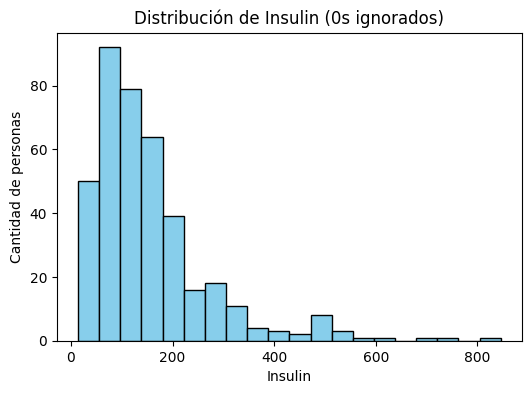

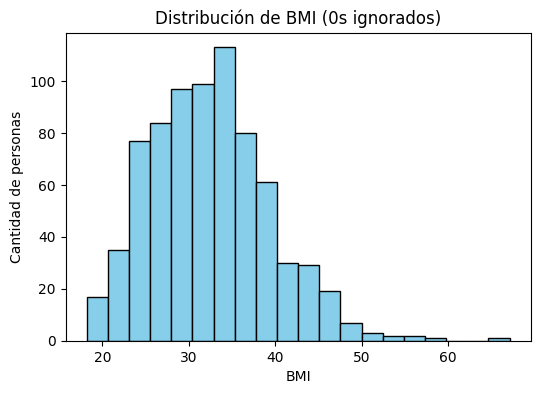

In [54]:
# Columns to plot
cols = ["SkinThickness", "Insulin", "BMI"]

# Create histograms ignoring 0s
for col in cols:
    # Filter out 0s
    data_no_zeros = diabetes[diabetes[col] != 0][col]
    
    plt.figure(figsize=(6, 4))
    plt.hist(data_no_zeros, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {col} (0s ignorados)")
    plt.xlabel(col)
    plt.ylabel("Cantidad de personas")
    plt.show()

## Mapa de Calor

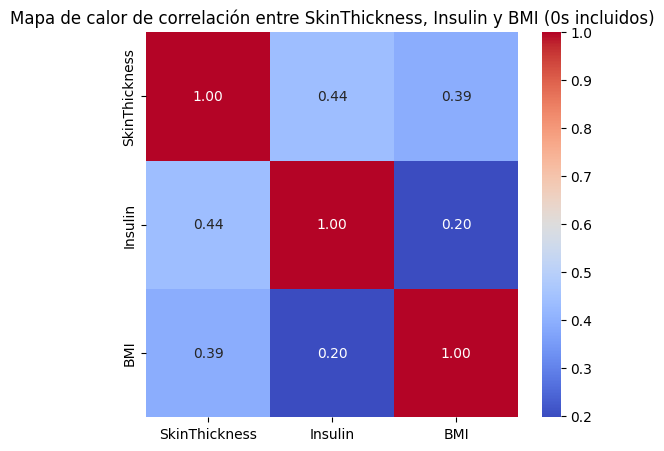

In [52]:
# Columns to analyze
cols = ["SkinThickness", "Insulin", "BMI"]

# Compute correlation matrix including 0s
corr_matrix = diabetes[cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación entre SkinThickness, Insulin y BMI (0s incluidos)")
plt.show()

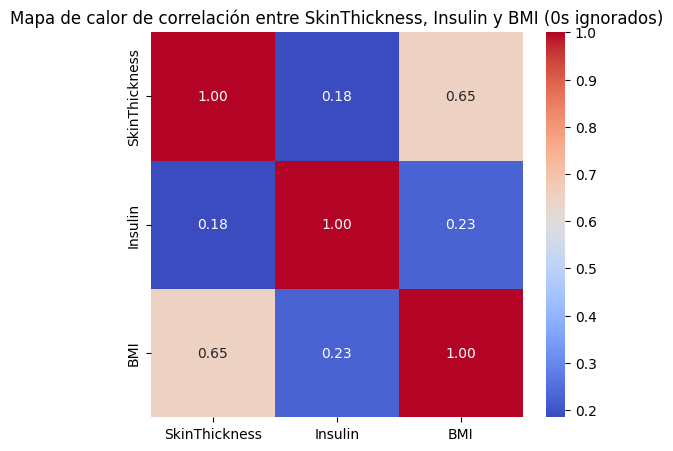

In [51]:
# Columns to analyze
cols = ["SkinThickness", "Insulin", "BMI"]

# Replace 0s with np.nan so they are ignored in correlations
diabetes_filtered = diabetes[cols].replace(0, np.nan)

# Compute correlation matrix
corr_matrix = diabetes_filtered.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación entre SkinThickness, Insulin y BMI (0s ignorados)")
plt.show()

### Análisis de las graficas

#### Análisis incluyendo 0s
Incluyendo los 0s:

Los gráficos muestran valores bajos y distribuciones sesgadas porque muchos 0s representan datos nulos. En los diagramas de barras, los promedios son bajos y las diferencias entre personas con y sin diabetes no son muy claras. En los diagramas de cajas y bigotes y los histogramas tienen muchos ceros, distorsionando la distribución de estas gráficas. Finalmente, el mapa de calor refleja correlaciones débiles entre las variables.

Excluyendo los 0s:

Los gráficos muestran los datos de manera más clara. Los promedios en los diagramas de barras muestran diferencias más evidentes entre los grupos, los diagramas de cajas y bigotes y los histogramas reflejan distribuciones precisas a de los datos tomados de los pacientes y el mapa de calor indica correlaciones más fuertes y significativas entre SkinThickness con BMI y más bajas entre la Insulina con SkinThickness y la Insulina con BMI. Así, se puede ver mejor la relación entre las variables y la diferencia entre personas con y sin diabetes.

# Preguntas Finales

#### ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
En mi opinión, todas las variables que he analizado y que no he incluido en mi análisis son importantes para determinar si una persona corre el riesgo de desarrollar diabetes. Estos datos permiten a los investigadores predecir con precisión las tendencias en pacientes con diabetes, lo que les permite tomar medidas tempranas para reducir los efectos o incluso prevenir su desarrollo antes de que sea demasiado tarde.

#### Si comparas el rango de las variables (min-max), ¿todas están en rangos similares? Describe sus rangos.
Si los datos incluyen 0, entonces los rangos tendrán mínimos similares pero máximos diferentes debido a que los valores nulos se ingresaron como 0 en los conjuntos de datos. Sin embargo, si el análisis no incluye 0, los rangos tendrán máximos y mínimos distintos, haciendo que cada rango sea único en sus propios aspectos. Cada variable tiene diferentes unidades de medida, lo que hace que comparar los valores directamente sea poco significativo. Para ver las diferencias exactas de rango:

Incluyendo 0:  
Grosor de piel (SkinThickness): (0, 99)  
Insulina (Insulin): (0, 846)  
BMI: (0, 67.1)  

Excluyendo 0:  
SkinThickness: (7, 99)  
Insulina (Insulin): (14, 846)  
BMI: (18.2, 67.1)  

#### ¿Existen variables que tengan datos atípicos? Describe cuáles si o no.
Cada una de las variables tiene datos atípicos, como se observa en los diagramas de caja y bigotes (box and whisker plots). Tanto incluyendo como excluyendo los 0, los diagramas muestran círculos que indican que ciertos valores son atípicos.

#### ¿Existe correlación alta entre variables? Describe algunas, indicando si es correlación positiva o negativa.
Incluyendo 0:
- Hay una correlación positiva moderada entre el grosor de piel (SkinThickness) y la insulina (Insulin).
- Hay una correlación positiva débil entre la insulina (Insulin) y el IMC (BMI).
- Hay una correlación positiva muy débil entre el grosor de piel (SkinThickness) y el IMC (BMI).

Excluyendo 0:
- Hay una correlación positiva muy débil entre el grosor de piel (SkinThickness) y la insulina (Insulin).
- Hay una correlación positiva débil entre la insulina (Insulin) y el IMC (BMI).
- Hay una correlación positiva fuerte entre el grosor de piel (SkinThickness) y el IMC (BMI).